[*********************100%%**********************]  1 of 1 completed



mean daily return:  0.0002093303494385926
mean annualized return:  0.05275124805852533
annualized volatility:  0.19605443460084238


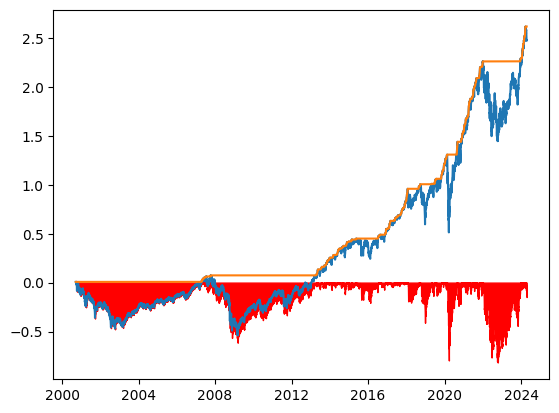

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = 'ES=F'
data = yf.download('ES=F')

prices = data['Adj Close']

# returns = np.log(prices) - np.log(prices.shift(1))
# returns = np.log(prices / prices.shift(1))
returns = np.log(prices).diff()

cumulative_returns = np.exp(np.cumsum(returns))-1

mean_daily_return = returns.mean()
mean_annualized_return = returns.mean()*252
annualized_volatility = returns.std() * np.sqrt(252)

print()
print('mean daily return: ', mean_daily_return)
print('mean annualized return: ', mean_annualized_return)
print('annualized volatility: ', annualized_volatility)

cum_max = cumulative_returns.cummax()
drawdown = cum_max - cumulative_returns

# Plots

plt.plot(cumulative_returns)

  # rolling --> apply a function on a specified rolling window
  # This line smooths out the short-term volatility to show the long-term trend in average annual returns
# plt.plot(returns.rolling(252).mean()*252)
# plt.plot(returns.rolling(252).std() * np.sqrt(252))

plt.plot(cum_max)
plt.fill_between(drawdown.index, - drawdown, color = 'red')
plt.show()

[*********************100%%**********************]  1 of 1 completed


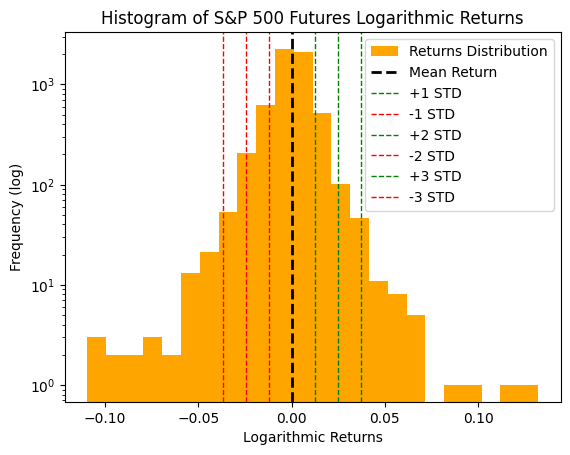

In [ ]:
ticker = 'ES=F'
data = yf.download(ticker)

returns = np.log(data['Adj Close']).diff()
mean_return = returns.mean()
std_return = returns.std()

# Determine the number of bins for the histogram
max_return = np.round(returns.max(),2)   # 2 is the number of decimal places
min_return = np.round(returns.min(),2)
n_bins = int((max_return - min_return)*100)

# Plot a histogram of the log returns
plt.hist(returns, bins = n_bins, color = 'orange', label = 'Returns Distribution')

#  Adding vertical lines for mean and standard deviations
plt.axvline(mean_return, color = 'black', linestyle = 'dashed', linewidth = 2, label = 'Mean Return' )

for i in range (1, 4):
  plt.axvline(mean_return + i * std_return, color ='green', linestyle ='dashed', linewidth = 1 , label = f'+{i} STD')
  plt.axvline(mean_return - i * std_return, color = 'red',
linestyle = 'dashed', linewidth = 1, label = f'-{i} STD')

# Configure the histogram
plt.title('Histogram of S&P 500 Futures Logarithmic Returns')
plt.xlabel('Logarithmic Returns')
plt.ylabel('Frequency (log)')
plt.yscale('log')
plt.legend()

# Display plot
plt.show()


In [ ]:
# 2.5 Quiz - Exercise 4

import numpy as np

returns = np.array([0.02, -0.03, 0.06, -0.04])
monthly_volatility = np.std(returns, ddof=1)
annualized_volatility = monthly_volatility * np.sqrt(12)
annualized_volatility_percentage = annualized_volatility * 100

print(annualized_volatility_percentage)

16.093476939431078


[*********************100%%**********************]  2 of 2 completed


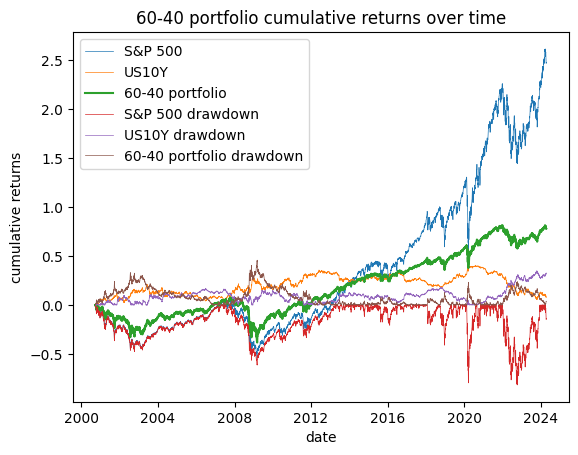

In [ ]:
tickers = ('ES=F', 'ZN=F')
prices = yf.download(tickers)['Adj Close']

# Checking for NAs and if number of rows match
# print(prices.describe())
# print()
# print(prices.isna().sum())

# forward filling NAs
prices = prices.ffill()

# since it's forward filling, there are still NAs in the first line, so you drop them
returns = np.log(prices).diff().dropna()
cum_returns = np.exp(returns.cumsum())-1

weights = [0.6, 0.4]
weighted_returns = returns * weights

# portfolio_returns = weighted_returns.iloc[:,0] + weighted_returns.iloc[:,1]
portfolio_returns = weighted_returns.sum(axis = 1)  # axis = 1 sums the two columns, axis = 0 would sum the rows
cum_portfolio_returns = portfolio_returns.cumsum()

# Plotting cumulative returns for the portfolio and the assets independently
plt.plot(cum_returns['ES=F'],label = 'S&P 500', linewidth = 0.5)
plt.plot(cum_returns['ZN=F'],label = 'US10Y', linewidth = 0.5)
plt.plot(cum_portfolio_returns,label = '60-40 portfolio', linewidth = 1.5)
plt.xlabel('date')
plt.ylabel('cumulative returns')
plt.title('60-40 portfolio cumulative returns over time')

# Calculate portfolio ongoing drawdown
  # cummax uses the rolling_max, since it's a cumulative function
portfolio_drawdown = cum_portfolio_returns.cummax() - cum_portfolio_returns

# S&P 500 and Treasuries ongoing drawdon
sp500_drawdown= cum_returns['ES=F'].cummax() - cum_returns['ES=F']
us10y_drawdown = cum_returns['ZN=F'].cummax() - cum_returns['ZN=F']

# Plotting the ongoing drawdowns
plt.plot(-sp500_drawdown, label = 'S&P 500 drawdown', linewidth = 0.5)
plt.plot(us10y_drawdown, label = 'US10Y drawdown', linewidth = 0.5)
plt.plot(portfolio_drawdown, label = '60-40 portfolio drawdown', linewidth = 0.5)
# plt.fill_between(portfolio_drawdown.index, -drawdown, color = 'red')
plt.legend()
plt.show()

In [ ]:
# 2.14 Quiz - Exercise 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

monthly_returns = np.array([0.02, -0.03, 0.04, -0.01,0.03,-0.05,0.06,-0.02,0.02,-0.04,0.05,-0.03])
cum_returns = pd.Series(monthly_returns.cumsum())

ongoing_drawdown = cum_returns.cummax() - cum_returns
max_drawdown = ongoing_drawdown.max()

print(ongoing_drawdown)
print()
print('Max drawdown: ', max_drawdown)

0     0.00
1     0.03
2     0.00
3     0.01
4     0.00
5     0.05
6     0.00
7     0.02
8     0.00
9     0.04
10    0.00
11    0.03
dtype: float64

Max drawdown:  0.05


In [ ]:
returns = np.array([5, -3, 7, 6, -4, 2, 3, 7, -5, 4,-6,8])
returns = returns/100
mean_return = returns.mean()

cubic_deviations = (returns - returns.mean())**3
mean_cubic_deviation = cubic_deviations.mean()

fourth_power_dev = (returns - returns.mean())**4
mean_fourth_power_dev = fourth_power_dev.mean()

st_dev = np.sqrt(((returns - returns.mean())**2).sum()/11)

skewness = mean_cubic_deviation / (st_dev**3)
print('Skewness: ', skewness)

kurtosis = mean_fourth_power_dev / (st_dev**4)
print('Kurtosis: ', kurtosis)

Skewness:  -0.38783887133511546
Kurtosis:  1.3569936583432425


In [ ]:
returns = np.array([2, 5, -10, -7, -7, -3, -1, 9, 8, -6, -4, 2])
returns = returns/100

mean_return = returns.mean()

print(mean_return)

cubic_deviations = (returns - returns.mean())**3
print(cubic_deviations)

mean_cubic_deviation = cubic_deviations.mean()
print(mean_cubic_deviation)

st_dev = np.std(returns,ddof=1)

print(st_dev)

skewness = mean_cubic_deviation / (st_dev**3)
print(skewness)

-0.01
[ 2.70e-05  2.16e-04 -7.29e-04 -2.16e-04 -2.16e-04 -8.00e-06  0.00e+00
  1.00e-03  7.29e-04 -1.25e-04 -2.70e-05  2.70e-05]
5.649999999999996e-05
0.06223124032772666
0.23443533828192323


In [ ]:
returns = np.array([-3, 3, 4, 0, 1, 3, -3, 7, -8, 8, -7, 4])
returns = returns/100
mean_return = returns.mean()

cubic_deviations = (returns - returns.mean())**3
mean_cubic_deviation = cubic_deviations.mean()

fourth_power_dev = (returns - returns.mean())**4
mean_fourth_power_dev = fourth_power_dev.mean()

st_dev = np.sqrt(((returns - returns.mean())**2).sum()/11)

skewness = mean_cubic_deviation / (st_dev**3)
print('Skewness: ', skewness)

kurtosis = mean_fourth_power_dev / (st_dev**4)
print('Kurtosis: ', kurtosis)

Skewness:  -0.3259138300157784
Kurtosis:  1.7509699015377012
